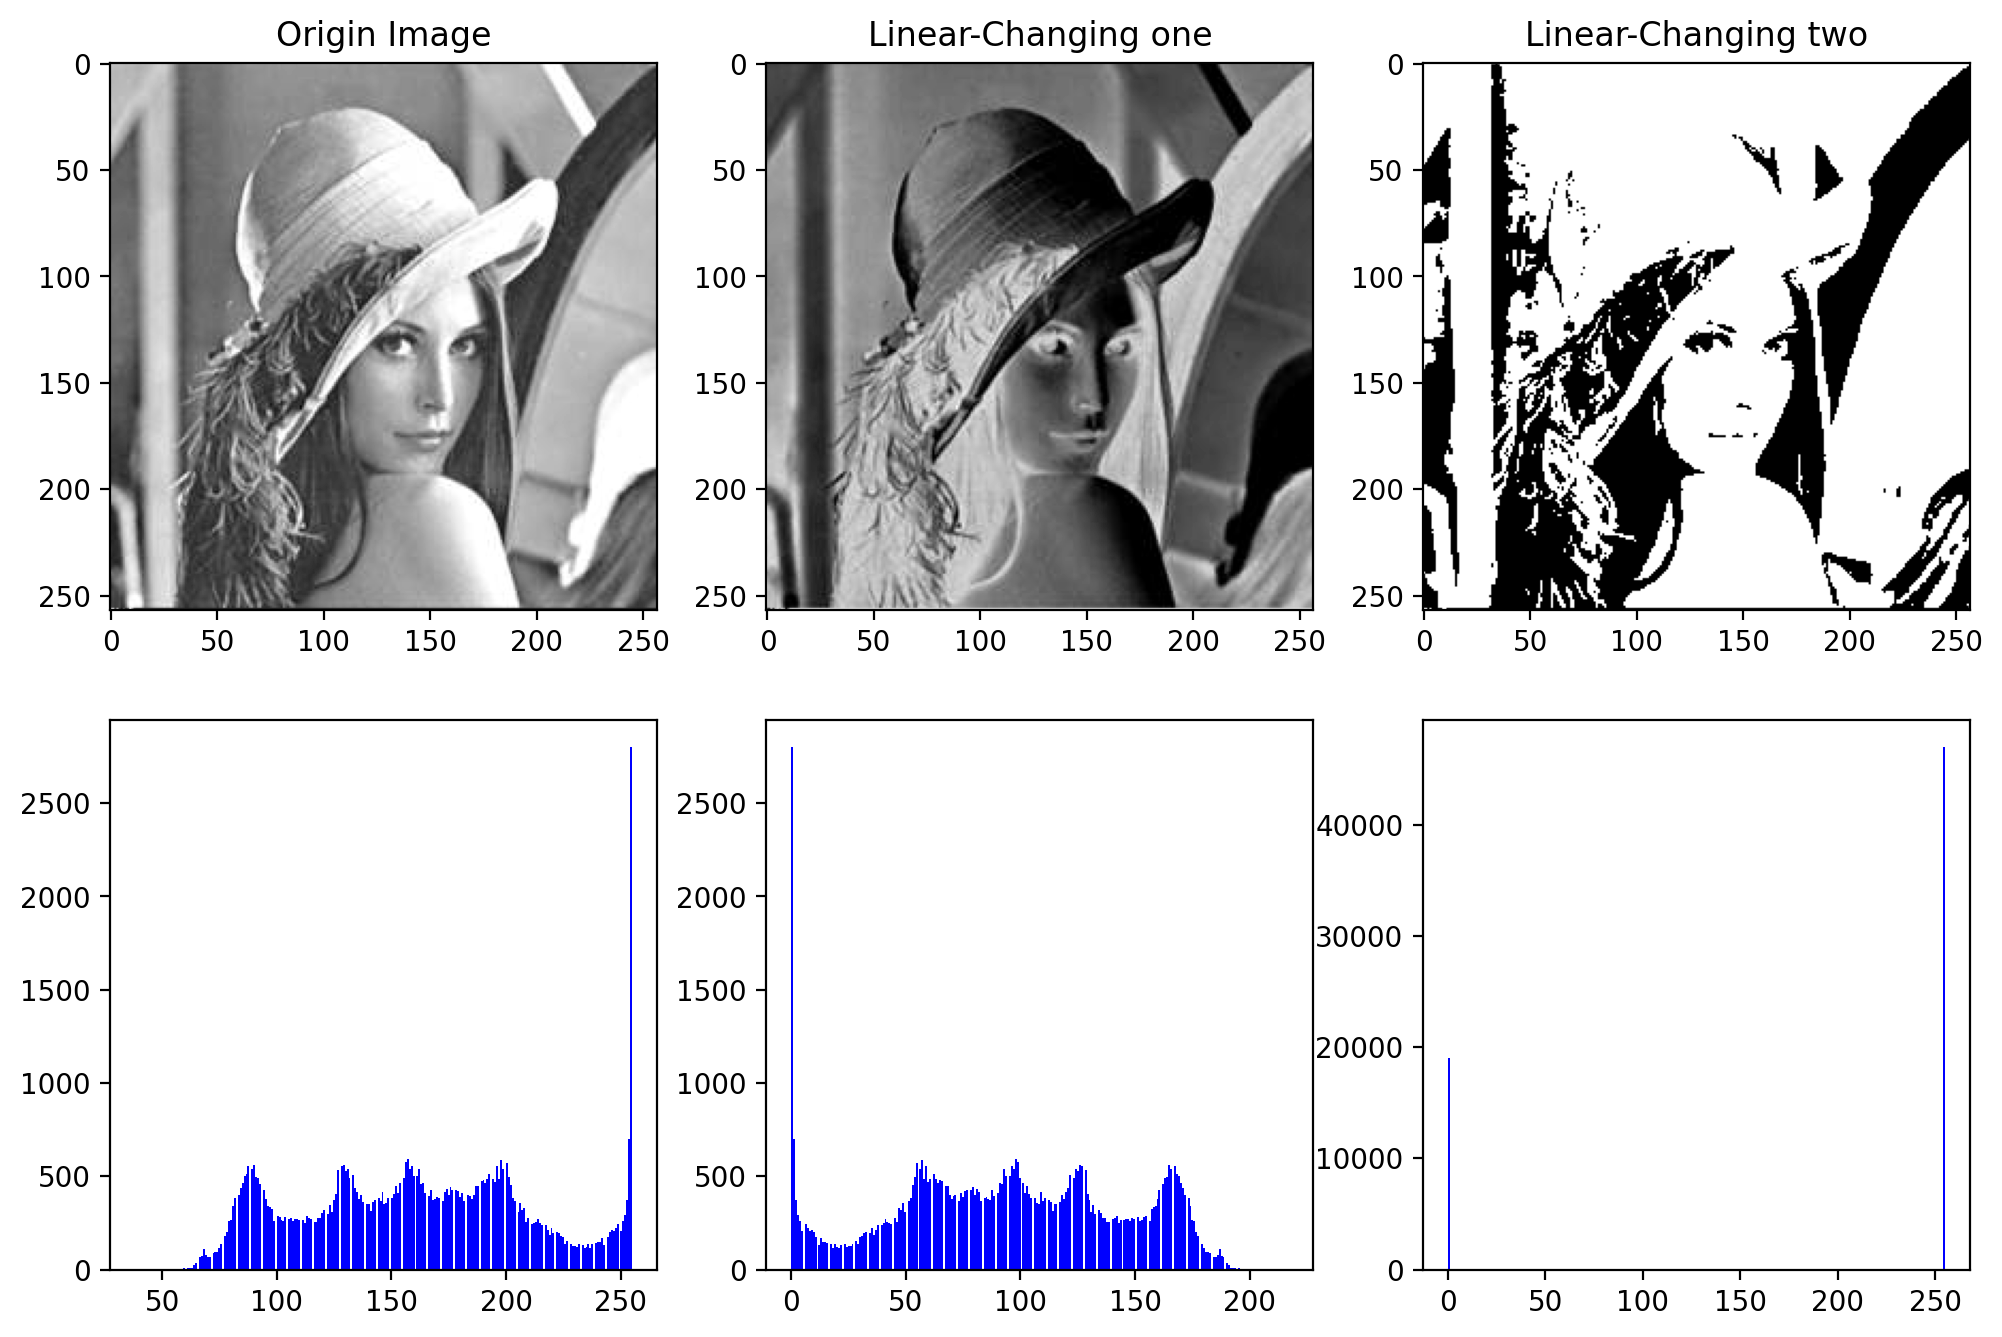

In [1]:
import cv2 as cv
import numpy as np
# from skimage import util
# from skimage import io
# import skimage
import matplotlib.pyplot as plt
def Changing(img):
    #进行线性变化1：g(x,y) = 255 - f(x,y)
    img_linearone = 255 - img[...]
    
    #进行线性变化2：
    #g(x,y) = 0   if f(x,y) <  128
    #g(x,y) = 255 if f(x,y) >= 128
    img_lineartwo = img.copy()
    img_lineartwo[img_lineartwo > 128] = 255
    img_lineartwo[img_lineartwo <= 128] = 0
    
    plt.figure(figsize = (12,8), dpi = 200)
    #原图像
    plt.subplot(231)
    
    plt.imshow(img, 'gray')
    plt.title("Origin Image")
    #原图直方图
    plt.subplot(234)
    plt.hist(img.flatten(), bins = 256, color = 'b')
    
    #线性变化1的原图
    plt.subplot(232)
    plt.imshow(img_linearone, 'gray')
    plt.title("Linear-Changing one")
    #线性变化1的直方图
    plt.subplot(235)
    plt.hist(img_linearone.flatten(), bins = 256, color = 'b')
    
    #线性变化2的原图
    plt.subplot(233)
    plt.imshow(img_lineartwo, 'gray')
    plt.title("Linear-Changing two")
    #线性变化2的直方图
    plt.subplot(236)
    plt.hist(img_lineartwo.flatten(), bins = 256, color = 'b')
    plt.show()
    return None

#分段线性变换
def Changing2(img):
    L = 256
    row, col = img.shape
    img_tmp = np.zeros([row,col], dtype = 'uint8')
    #进行分段线性变换
    for i in range(row):
        for j in range(col):
                if (img[i,j] < 96):
                    img_tmp[i,j] = (1/3) * img[i,j]
                elif (96 <= img[i,j] and img[i,j] < 160):
                    img_tmp[i,j] = 3 * (img[i,j] - 96) + 32
                else:
                    img_tmp[i,j] = (1/3) * (img[i,j] - 160) + 224
    img_tmp = img_tmp[...,::-1]
    return img_tmp

img = cv.imread("C://Users//XRUI//Desktop//NewFolder2/a.jpg", cv.IMREAD_GRAYSCALE)
Changing(img)




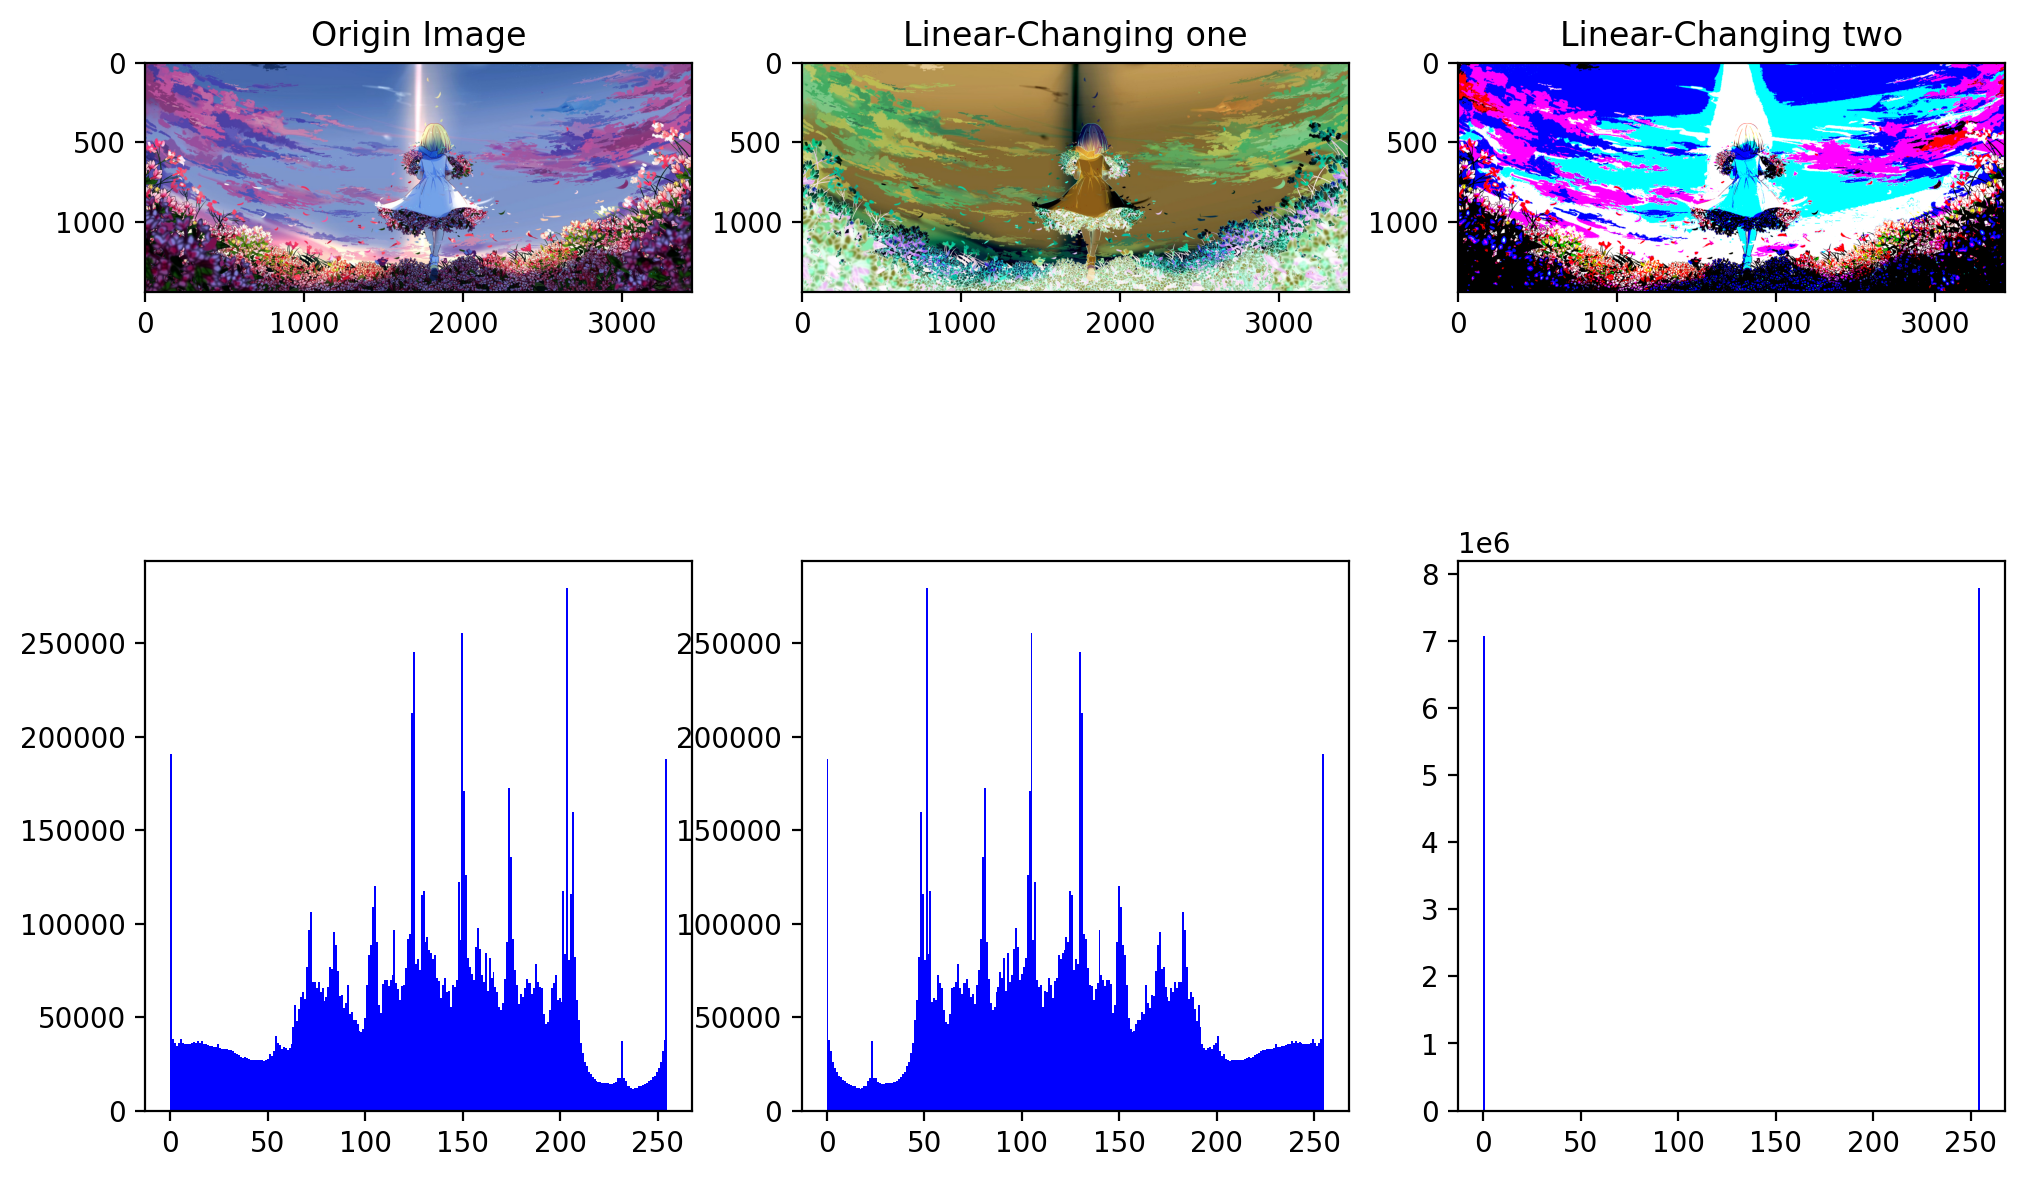

In [8]:
img_color = cv.imread("C://Users//XRUI//Desktop//NewFolder2/the_bride.jpg")
img_color = img_color[...,::-1]
Changing(img_color)

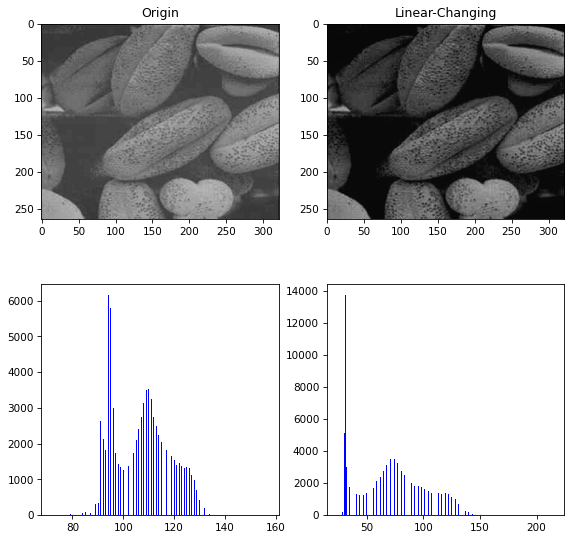

In [50]:
img2 = cv.imread("C://Users//XRUI//Desktop//NewFolder2/t2.jpg", cv.IMREAD_GRAYSCALE)
img2_change = Changing2(img2)
img2 = img2[...,::-1]
plt.figure(figsize=(9,9),dpi = 75)
plt.subplot(221)
plt.imshow(img2, 'gray')
plt.title("Origin")
plt.subplot(222)
plt.imshow(img2_change, 'gray')
plt.title("Linear-Changing")
plt.subplot(223)
plt.hist(img2.flatten(), bins = 256, color = 'b')
plt.subplot(224)
plt.hist(img2_change.flatten(), bins = 256, color = 'b')
plt.show()

<ipython-input-9-658c382aa55d>:8: RuntimeWarning: divide by zero encountered in log
  img3_log = np.round(np.log(img3 + 1)).astype('uint8')


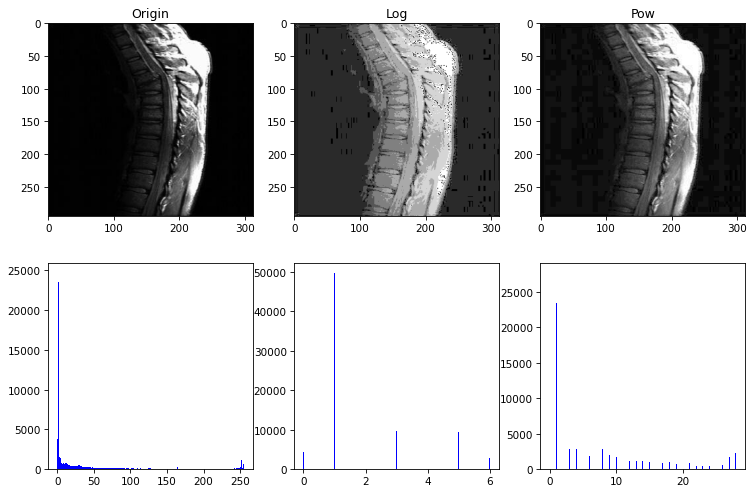

In [9]:
img3 = cv.imread("C://Users//XRUI//Desktop//NewFolder2/t3.jpg", cv.IMREAD_GRAYSCALE)
img3_log = np.zeros(img.shape, dtype = 'uint8')
img3_pow = np.zeros(img.shape, dtype = 'uint8')
#进行Log, Power变换
img3_log = np.round(np.log(img3 + 1)).astype('uint8')
img3_pow = np.round(np.power(img3, 0.6)).astype('uint8')

#绘图部分
plt.figure(figsize = (12,8), dpi = 75)
plt.subplot(231)
plt.title("Origin")
plt.imshow(img3, 'gray')
plt.subplot(232)
plt.imshow(img3_log, 'gray')
plt.title("Log")
plt.subplot(233)
plt.imshow(img3_pow, 'gray')
plt.title("Pow")
plt.subplot(234)
plt.hist(img3.flatten(), bins = 255, color = 'b')
plt.subplot(235)
plt.hist(img3_log.flatten(), bins = 255, color = 'b')
plt.subplot(236)
plt.hist(img3_pow.flatten(), bins = 255, color = 'b')
plt.show()